In [2]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np

import networkx as nx

from sklearn.decomposition import *
from sklearn.cluster import *
from sklearn.metrics import *
from sklearn.neighbors import *

import matplotlib.pyplot as plt
import seaborn as sns


from utils.datasets import load
from utils.metrics import *

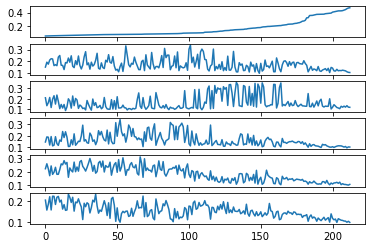

In [4]:
# SJAFFE
X, ll, ld = load("SJAFFE")
def plot_for_label(label_id):
    ld_sorted = ld[np.argsort(ld[:, label_id])]
    plt.subplot(611)
    plt.plot(range(ld.shape[0]), ld_sorted[:, 0])
    plt.subplot(612)
    plt.plot(range(ld.shape[0]), ld_sorted[:, 1])
    plt.subplot(613)
    plt.plot(range(ld.shape[0]), ld_sorted[:, 2])
    plt.subplot(614)
    plt.plot(range(ld.shape[0]), ld_sorted[:, 3])
    plt.subplot(615)
    plt.plot(range(ld.shape[0]), ld_sorted[:, 4])
    plt.subplot(616)
    plt.plot(range(ld.shape[0]), ld_sorted[:, 5])
    plt.show()

# draw the first label
plot_for_label(0)

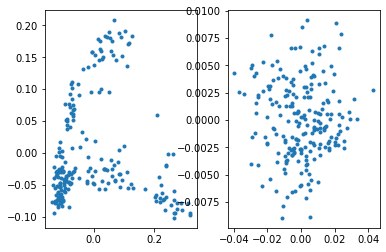

In [8]:
low_ld = PCA(n_components=2).fit_transform(ld)
low_X = PCA(n_components=2).fit_transform(X)
plt.subplot(121)
plt.plot(low_ld[:, 0], low_ld[:, 1], '.')
plt.subplot(122)
plt.plot(low_X[:, 0], low_X[:, 1], '.')
plt.show()

[1.017444219066937, 1.3898580121703854, 1.5334685598377282, 1.614604462474645, 1.6778904665314403, 1.720081135902637, 1.7411764705882353, 1.7793103448275862, 1.7914807302231237, 1.8182555780933063, 1.8296146044624746, 1.8612576064908721, 1.8442190669371197, 1.8847870182555782, 1.8782961460446248, 1.859634888438134, 1.8774847870182556, 1.9002028397565922, 1.8937119675456389, 1.9002028397565922, 1.898580121703854, 1.8880324543610547, 1.9099391480730223, 1.9359026369168357, 1.9164300202839757, 1.9302231237322516, 1.9310344827586208, 1.936713995943205]


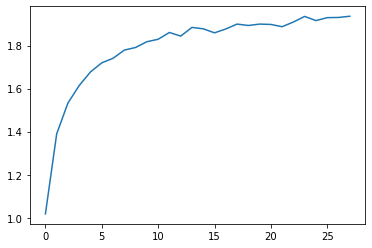

In [6]:
X, ll, ld = load("Yeast_alpha")
res = []
def cluster_difference(feat_clus, label_clus):
    res = 0
    for i in range(feat_clus.size):
        fneis = feat_clus[feat_clus == feat_clus[i]]
        lneis = label_clus[label_clus == label_clus[i]]
        res += np.union1d(np.setdiff1d(fneis, lneis), np.setdiff1d(lneis, fneis)).size
    return res / feat_clus.size
for c in range(2, 30):
    clu_feat = KMeans(n_clusters=c, random_state=0).fit(X).labels_
    clu_label = KMeans(n_clusters=c, random_state=0).fit(ll).labels_
    x = cluster_difference(clu_feat, clu_label)
    res.append(x)
print(res)
plt.plot(range(len(res)), res)
plt.show()

[1.0255578093306288, 1.3460446247464504, 1.5918864097363083, 1.690872210953347, 1.7119675456389452, 1.6738336713995943, 1.754158215010142, 1.7744421906693713, 1.7947261663286005, 1.8279918864097362, 1.7703853955375253, 1.8572008113590264, 1.8677484787018255, 1.8685598377281947, 1.8255578093306288, 1.8872210953346855, 1.9002028397565922, 1.889655172413793, 1.922920892494929, 1.8977687626774848, 1.9115618661257607, 1.9042596348884382, 1.922920892494929, 1.922920892494929, 1.9204868154158214, 1.9448275862068964, 1.947261663286004, 1.9391480730223123]


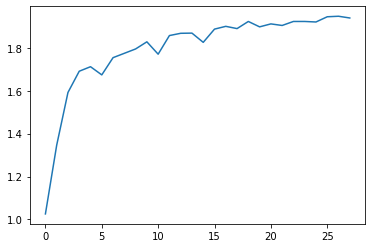

In [5]:
X, ll, ld = load("Yeast_alpha")
res = []
def cluster_difference(feat_clus, label_clus):
    res = 0
    for i in range(feat_clus.size):
        fneis = feat_clus[feat_clus == feat_clus[i]]
        lneis = label_clus[label_clus == label_clus[i]]
        res += np.union1d(np.setdiff1d(fneis, lneis), np.setdiff1d(lneis, fneis)).size
    return res / feat_clus.size
for c in range(2, 30):
    clu_feat = KMeans(n_clusters=c, random_state=0).fit(X).labels_
    clu_label = KMeans(n_clusters=c, random_state=0).fit(ld).labels_
    x = cluster_difference(clu_feat, clu_label)
    res.append(x)
print(res)
plt.plot(range(len(res)), res)
plt.show()

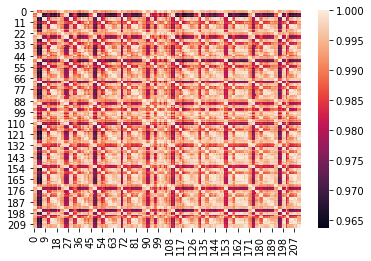

In [75]:
S = pairwise_kernels(ld, metric='rbf')
# S = S / S.sum(1, keepdims=True)
sns.heatmap(S)
plt.show()

In [41]:
X, ll, ld = load("SJAFFE")

A = pairwise_kernels(X, metric='linear')
A = A * (np.ones_like(A) - np.eye(A.shape[0]))
Dv = np.diag(np.power(A.sum(0), -0.5))
Lx = np.eye(Dv.shape[0]) - Dv @ A @ Dv

A = pairwise_kernels(ld, metric='linear')
A = A * (np.ones_like(A) - np.eye(A.shape[0]))
Dv = np.diag(np.power(A.sum(0), -0.5))
Ly = np.eye(Dv.shape[0]) - Dv @ A @ Dv

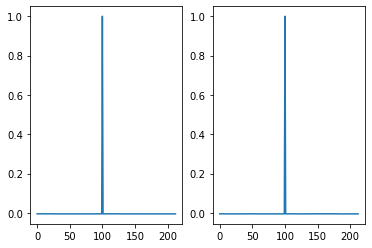

In [48]:
plt.cla()
plt.subplot(121)
plt.plot(range(Lx[0].size), Lx[100])
plt.subplot(122)
plt.plot(range(Ly[0].size), Ly[100])
plt.show()

***How to measure the information difference between two instances in feature space?***

Given: $x_i = [x_{i,A}, x_{i,B}]$ and $x_j = [x_{j,A}, x_{j,B}]$.

The information that $x_i$ is observed is $-\log p(a=x_{i,a}) - \log p(b=x_{i, b})$. When $x_i$ is observed, how it can help us o

The difference between $x_i$ and $x_j$ in the random variable $A$ is:
$$
-\log p(a=x_i)
$$

(2465, 18)


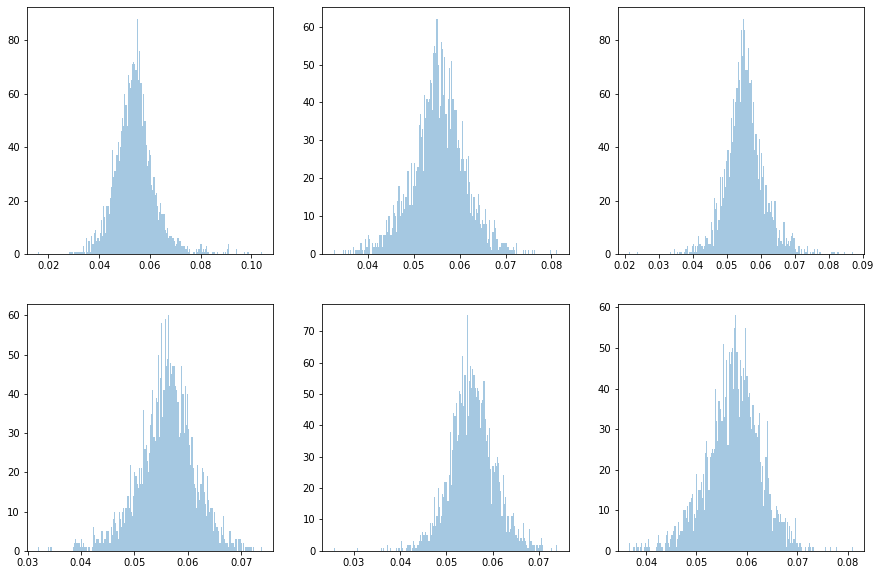

In [16]:
X, ll, ld = load("SJAFFE")
print(X.shape)
probx = np.exp(KernelDensity(bandwidth=0.4).fit(X).score_samples(X))
SX = pairwise_distances(np.arange(X.shape[0]).reshape(-1, 1), metric=lambda i, j: -np.log(probx[int(i)]/probx[int(j)]))
proby = np.exp(KernelDensity(bandwidth=0.4).fit(ld).score_samples(ld))
SY = pairwise_distances(np.arange(X.shape[0]).reshape(-1, 1), metric=lambda i, j: -np.log(proby[int(i)]/proby[int(j)]))
_SX = SX / SX.sum(1, keepdims=True)
_SY = SY / SY.sum(1, keepdims=True)
print(np.abs(_SX - _SY).flatten().mean())

for m in ['additive_chi2', 'chi2', 'linear', 'poly', 'rbf', 'laplacian', 'sigmoid', 'cosine']:
    rbfSX = pairwise_kernels(X, metric=m)
    rbfSX /= rbfSX.sum(1, keepdims=True)
    rbfSY = pairwise_kernels(ld, metric=m)
    rbfSY /= rbfSY.sum(1, keepdims=True)
    print(np.abs(rbfSX - rbfSY).flatten().mean())

(213, 243)
0.09410525965401519
0.0026524751
0.00033892307
0.0003939167
2.962097e-05
2.460482e-05
0.00010717389562776329
5.2707223e-06
0.00041084376


In [11]:
_SX

array([[-0.00000000e+00,  1.93079534e-03,  2.21375555e-03, ...,
        -1.55758201e-03, -1.69062038e-03, -1.92028056e-03],
       [-5.14118010e-04,  0.00000000e+00, -7.53445671e-05, ...,
         9.28859513e-04,  9.64283995e-04,  1.02543622e-03],
       [-4.97259280e-04, -6.35592260e-05,  0.00000000e+00, ...,
         8.47127226e-04,  8.77010637e-04,  9.28597477e-04],
       ...,
       [ 3.21785801e-04,  7.20674928e-04,  7.79132574e-04, ...,
         0.00000000e+00,  2.74848191e-05,  7.49310426e-05],
       [ 3.27142646e-04,  7.00760227e-04,  7.55514300e-04, ...,
         2.57435235e-05,  0.00000000e+00,  4.44402770e-05],
       [ 3.34923411e-04,  6.71680746e-04,  7.21032909e-04, ...,
         6.32596291e-05,  4.00559020e-05,  0.00000000e+00]])

In [12]:
_SY

array([[ 0.00000000e+00,  1.78188514e-03,  6.11871989e-04, ...,
        -1.32138885e-04, -4.80365280e-04, -1.31568836e-03],
       [-5.25818587e-04, -0.00000000e+00,  3.45260560e-04, ...,
         5.64811606e-04,  6.67570143e-04,  9.14066617e-04],
       [-1.20120756e-03,  2.29693247e-03, -0.00000000e+00, ...,
         1.46061840e-03,  2.14424534e-03,  3.78412495e-03],
       ...,
       [ 9.94433226e-05,  1.44043071e-03,  5.59917796e-04, ...,
        -0.00000000e+00,  2.62063583e-04,  8.90699906e-04],
       [ 2.19769256e-04,  1.03498965e-03,  4.99703417e-04, ...,
         1.59315127e-04, -0.00000000e+00,  3.82164033e-04],
       [ 3.10071904e-04,  7.30013687e-04,  4.54273462e-04, ...,
         2.78930369e-04,  1.96862894e-04, -0.00000000e+00]])

-1.6431300764452317e-14

1.8347055e-06
7.894123e-07
1.1341181e-06
1.950626e-06
8.478528e-07
-2.3532608153797874e-15
9.897049e-07
3.3696415e-06


In [143]:
cluster_difference(AffinityPropagation().fit(_SX).labels_, AffinityPropagation().fit(_SY).labels_)

/home/yunan/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "
/home/yunan/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


1.9906103286384977